# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [92]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [107]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"   
# # Define an empty list to fetch the weather data for each city
city_data = []



# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
       

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&units={units}&q="

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url + city).json()
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "date": city_date
                     })

    # skip the city if an error occurs
    except:
        print("City '" + city.title() + "' not found. Skipping...")
        pass

#  data loading complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | porto novo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | iroquois falls
Processing Record 6 of Set 1 | akhmeta
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | altay
Processing Record 13 of Set 1 | kyabe
Processing Record 14 of Set 1 | aklavik
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | urumqi
Processing Record 19 of Set 1 | panama city
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | lata
Processing Record 22 of Set 1 | luderitz
Processing Record 23 of Set 1 | manta
Pro

Processing Record 37 of Set 4 | san miguelito
Processing Record 38 of Set 4 | muroto
Processing Record 39 of Set 4 | itarema
Processing Record 40 of Set 4 | westlock
Processing Record 41 of Set 4 | severo-kurilsk
Processing Record 42 of Set 4 | mys shmidta
City 'Mys Shmidta' not found. Skipping...
Processing Record 43 of Set 4 | palabuhanratu
City 'Palabuhanratu' not found. Skipping...
Processing Record 44 of Set 4 | texarkana
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | kahului
Processing Record 47 of Set 4 | coahuayana
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | tambopata
Processing Record 50 of Set 4 | yeppoon
Processing Record 1 of Set 5 | elesbao veloso
Processing Record 2 of Set 5 | iqaluit
Processing Record 3 of Set 5 | atambua
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | kismayo
Processing Record 6 of Set 5 | bilibino
Processing Record 7 of Set 5 | jodhpur
Processing Record 8 of Set 5 |

Processing Record 20 of Set 8 | salalah
Processing Record 21 of Set 8 | tevaitoa
Processing Record 22 of Set 8 | dingle
Processing Record 23 of Set 8 | manbij
Processing Record 24 of Set 8 | ouadda
Processing Record 25 of Set 8 | delta del tigre
Processing Record 26 of Set 8 | usinsk
Processing Record 27 of Set 8 | pacific grove
Processing Record 28 of Set 8 | giengen
City 'Giengen' not found. Skipping...
Processing Record 29 of Set 8 | matay
Processing Record 30 of Set 8 | bolu
Processing Record 31 of Set 8 | kamenka
Processing Record 32 of Set 8 | tingi
Processing Record 33 of Set 8 | beisfjord
Processing Record 34 of Set 8 | kavaratti
Processing Record 35 of Set 8 | grimshaw
Processing Record 36 of Set 8 | port moresby
Processing Record 37 of Set 8 | eureka
Processing Record 38 of Set 8 | guangyuan
Processing Record 39 of Set 8 | christchurch
Processing Record 40 of Set 8 | wakkanai
Processing Record 41 of Set 8 | yar-sale
Processing Record 42 of Set 8 | sao mateus
Processing Record

Processing Record 10 of Set 12 | pingzhuang
Processing Record 11 of Set 12 | lokosovo
Processing Record 12 of Set 12 | bur gabo
City 'Bur Gabo' not found. Skipping...
Processing Record 13 of Set 12 | kralendijk
Processing Record 14 of Set 12 | fort portal
Processing Record 15 of Set 12 | gonda
Processing Record 16 of Set 12 | moroni
Processing Record 17 of Set 12 | tucurui
Processing Record 18 of Set 12 | berlevag
Processing Record 19 of Set 12 | bouca
Processing Record 20 of Set 12 | mionica
Processing Record 21 of Set 12 | rouvroy
Processing Record 22 of Set 12 | otradnoye
Processing Record 23 of Set 12 | finschhafen
Processing Record 24 of Set 12 | anahuac
Processing Record 25 of Set 12 | adrar
Processing Record 26 of Set 12 | cururupu
Processing Record 27 of Set 12 | masterton
Processing Record 28 of Set 12 | roald
Processing Record 29 of Set 12 | mairana
Processing Record 30 of Set 12 | santa eulalia del rio
City 'Santa Eulalia Del Rio' not found. Skipping...
Processing Record 31 

In [108]:
# city_data

In [109]:
# response['coord']['lat']

In [110]:
# Convert the cities weather data into a Pandas DataFrame
# city_data = {
#     "City": cities,
#     "Cloudiness": city_clouds,
#     "Country": city_country,
#     "Date": city_date,
#     "Humidity": city_humidity,
#     "Latitude": city_lon,
#     "Longitude": city_lng,
#     "Max Temp": city_max_temp,
#     "Wind Speed": city_wind
# }

city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
date          576
dtype: int64

In [111]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,date
0,Butaritari,3.0707,172.7902,81.66,77,89,16.64,KI,1670539997
1,Chokurdakh,70.6333,147.9167,-23.19,99,98,4.56,RU,1670539998
2,Porto Novo,6.4965,2.6036,79.57,81,80,5.61,BJ,1670539998
3,Ushuaia,-54.8000,-68.3000,44.26,76,100,13.80,AR,1670539745
4,Iroquois Falls,48.7669,-80.6831,5.16,92,17,2.44,CA,1670539999


In [112]:
if not os.path.exists("output_data"):
    os.mkdir("output_data")


In [113]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [114]:

# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,date
City_ID,,,,,,,,,
0,Butaritari,3.0707,172.7902,81.66,77,89,16.64,KI,1670539997
1,Chokurdakh,70.6333,147.9167,-23.19,99,98,4.56,RU,1670539998
2,Porto Novo,6.4965,2.6036,79.57,81,80,5.61,BJ,1670539998
3,Ushuaia,-54.8000,-68.3000,44.26,76,100,13.80,AR,1670539745
4,Iroquois Falls,48.7669,-80.6831,5.16,92,17,2.44,CA,1670539999


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

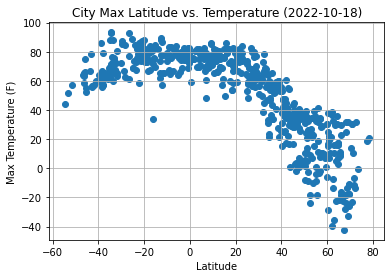

In [115]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

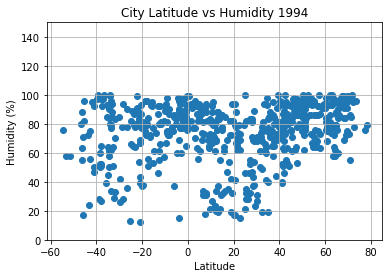

In [116]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {2022-10-18}')
plt.ylim(0, 150)
plt.grid()

# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

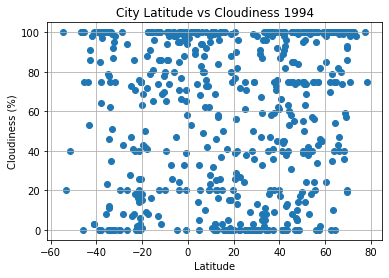

In [117]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {2022-10-18}')
plt.grid()

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

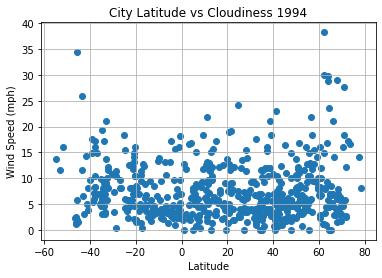

In [118]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Cloudiness {2022-10-18}')
plt.grid()


# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [119]:
# Define a function to create Linear Regression plots


def linregress_plot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


In [120]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,date
City_ID,,,,,,,,,
0,Butaritari,3.0707,172.7902,81.66,77,89,16.64,KI,1670539997
1,Chokurdakh,70.6333,147.9167,-23.19,99,98,4.56,RU,1670539998
2,Porto Novo,6.4965,2.6036,79.57,81,80,5.61,BJ,1670539998
4,Iroquois Falls,48.7669,-80.6831,5.16,92,17,2.44,CA,1670539999
5,Akhmeta,42.0311,45.2075,34.32,89,91,0.83,GE,1670539999


In [121]:

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,date
City_ID,,,,,,,,,
3,Ushuaia,-54.8000,-68.3000,44.26,76,100,13.80,AR,1670539745
7,Atuona,-9.8000,-139.0333,77.90,67,65,13.98,PF,1670539902
9,Punta Arenas,-53.1500,-70.9167,51.91,58,20,11.50,CL,1670539989
14,Mataura,-46.1927,168.8643,63.48,55,100,1.23,NZ,1670540003
15,Busselton,-33.6500,115.3333,59.99,62,35,3.56,AU,1670540003


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8607751332110929


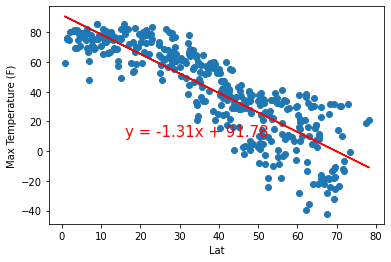

In [122]:
# Linear regression on Northern Hemisphere
 
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')

print(f"The r-value is: {rvalue}")


plt.savefig("../WeatherPy")
plt.show() 



The r-value is: 0.4679598414912345


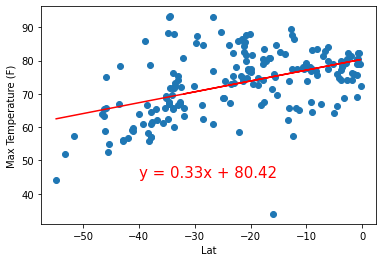

In [123]:
# Linear regression on Southern Hemisphere

x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')

print(f"The r-value is: {rvalue}")

plt.savefig("../WeatherPy")
plt.show()


**Discussion about the linear relationship:** The northern hemisphere has a negative correlation between latitude and max temperature, whereas the southern hemisphere has a positive correlation. Latitude increases in the Northern Hemisphere as you move further from the equator, and viceversa in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3845971108407882


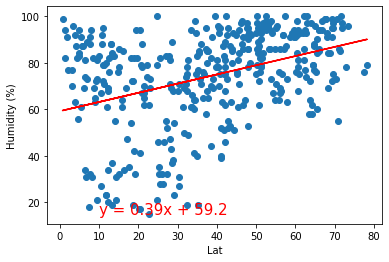

In [124]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity (%)')




print(f"The r-value is: {rvalue}")
plt.savefig("../WeatherPy")

plt.show() 

The r-value is: 0.23470712781575254


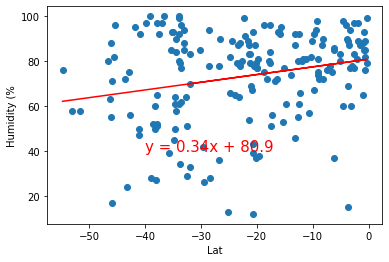

In [125]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 4: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity (%')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):

print(f"The r-value is: {rvalue}")

plt.savefig("../WeatherPy")

plt.show()


**Discussion about the linear relationship:** Not really any/weak positive correlation in the southern and northern hemispheres. Although, In the higher latitudes of the northern hemisphere there appears to be some correlation. As latitudes increase and decrease, humidity is not influenced any any way.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23109325667828837


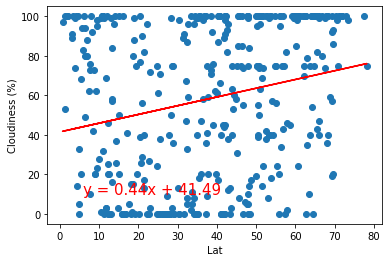

In [126]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness (%)')


print(f"The r-value is: {rvalue}")
plt.savefig("../WeatherPy")
plt.show() 



The r-value is: 0.1268479586270466


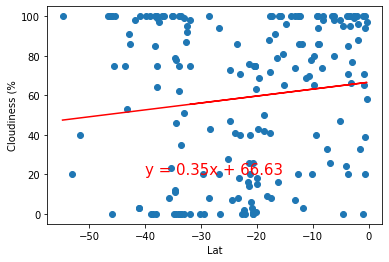

In [127]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness (%')

print(f"The r-value is: {rvalue}")
plt.savefig("../WeatherPy")
plt.show() 


**Discussion about the linear relationship:** No correlation/extremely weak positive correlation. The values for cloudiness and latitude are randomly dispersed about the chart. So as you increase and decrease latitude, cloudiness is not influenced. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13565581107484004


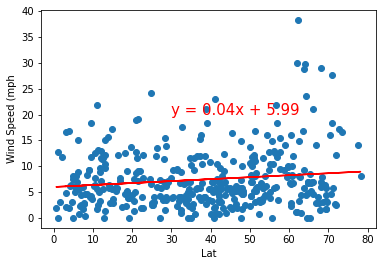

In [128]:
# Northern Hemisphere

x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed (mph')



print(f"The r-value is: {rvalue}")
plt.savefig("../WeatherPy")
plt.show() 


The r-value is: -0.26216056118423997


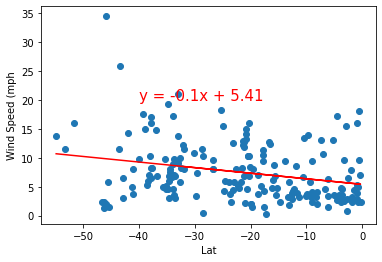

In [129]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed (mph')

print(f"The r-value is: {rvalue}")
plt.savefig("../WeatherPy")
plt.show() 

**Discussion about the linear relationship:** The chart displays a weak negative correlation between Wind Speed and Latitude. The farther south of the equator you go, the slightly higer wind speeds experienced, and vice versa the closer you go to the equator.